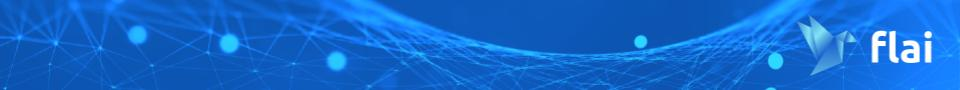

## **Aula 12 - Regressão com PyCaret**

---
## **Importação e Preparação dos Dados**

In [ ]:
#instalar pycaret
!pip install pycaret

In [37]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


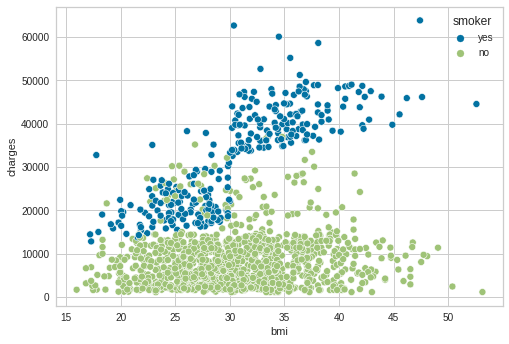

In [38]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

## **Objetivo: construir um modelo para detectar fumantes e possíveis fraudadores dessa variável.**

In [ ]:
from pycaret.classification import setup, models, create_model, tune_model, \
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, \
                               finalize_model, save_model, load_model

In [39]:
classificacao = setup(data = dados,
                      target = 'smoker',
                      normalize = True)

,Description,Value
0,session_id,3166
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
melhores = compare_models(n_select = 3, sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9551,0.9885,0.9195,0.8784,0.8966,0.8680,0.8699,0.137
lightgbm,Light Gradient Boosting Machine,0.9541,0.9911,0.9295,0.8677,0.8951,0.8659,0.8686,0.091
lr,Logistic Regression,0.9508,0.9868,0.9039,0.8750,0.8862,0.8549,0.8576,0.316
svm,SVM - Linear Kernel,0.9412,0.0000,0.8834,0.8510,0.8587,0.8220,0.8286,0.015
dt,Decision Tree Classifier,0.9402,0.9070,0.8492,0.8709,0.8574,0.8196,0.8216,0.015
ada,Ada Boost Classifier,0.9402,0.9831,0.8742,0.8506,0.8607,0.8227,0.8240,0.118
rf,Random Forest Classifier,0.9391,0.9862,0.8739,0.8527,0.8599,0.8211,0.8238,0.503
et,Extra Trees Classifier,0.9305,0.9816,0.7934,0.8740,0.8290,0.7856,0.7891,0.461
lda,Linear Discriminant Analysis,0.9294,0.9825,0.8342,0.8411,0.8343,0.7897,0.7923,0.015
knn,K Neighbors Classifier,0.9241,0.9676,0.7787,0.8559,0.8131,0.7657,0.7688,0.117


In [42]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9362,0.9905,0.8500,0.8500,0.8500,0.8095,0.8095
1,0.9468,0.9973,0.8000,0.9412,0.8649,0.8320,0.8363
2,0.9574,0.9926,0.9500,0.8636,0.9048,0.8774,0.8791
3,0.9574,0.9831,1.0000,0.8333,0.9091,0.8816,0.8879
4,0.9574,0.9912,0.9000,0.9000,0.9000,0.8730,0.8730
5,0.9681,0.9919,0.9500,0.9048,0.9268,0.9064,0.9069
6,0.9355,0.9858,0.8947,0.8095,0.8500,0.8090,0.8107
7,0.9462,0.9911,1.0000,0.8000,0.8889,0.8540,0.8633
8,0.9677,0.9938,1.0000,0.8696,0.9302,0.9094,0.9131
9,0.9677,0.9938,0.9500,0.9048,0.9268,0.9062,0.9066


In [43]:
lightgbm_tunado = tune_model(lightgbm, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9574,0.9959,0.9000,0.9000,0.9000,0.8730,0.8730
1,0.9894,0.9997,0.9500,1.0000,0.9744,0.9677,0.9682
2,0.9681,0.9912,0.9500,0.9048,0.9268,0.9064,0.9069
3,0.9468,0.9814,0.9500,0.8261,0.8837,0.8495,0.8529
4,0.9574,0.9757,0.9500,0.8636,0.9048,0.8774,0.8791
5,0.9574,0.9895,0.9000,0.9000,0.9000,0.8730,0.8730
6,0.9570,0.9922,1.0000,0.8261,0.9048,0.8773,0.8840
7,0.9570,0.9870,1.0000,0.8333,0.9091,0.8812,0.8875
8,0.9462,0.9805,1.0000,0.8000,0.8889,0.8540,0.8633
9,0.9570,0.9921,0.9000,0.9000,0.9000,0.8726,0.8726


In [44]:
modelo_combinado = blend_models(melhores, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9468,0.9892,0.9000,0.8571,0.8780,0.8441,0.8445
1,0.9468,0.9953,0.8000,0.9412,0.8649,0.8320,0.8363
2,0.9681,0.9953,0.9500,0.9048,0.9268,0.9064,0.9069
3,0.9574,0.9845,1.0000,0.8333,0.9091,0.8816,0.8879
4,0.9574,0.9919,0.9000,0.9000,0.9000,0.8730,0.8730
5,0.9787,0.9919,1.0000,0.9091,0.9524,0.9387,0.9405
6,0.9462,0.9865,0.8947,0.8500,0.8718,0.8378,0.8383
7,0.9677,0.9911,1.0000,0.8696,0.9302,0.9094,0.9131
8,0.9570,0.9849,1.0000,0.8333,0.9091,0.8812,0.8875
9,0.9677,0.9959,0.9500,0.9048,0.9268,0.9062,0.9066


In [45]:
modelo_stack = stack_models(melhores)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9362,0.9878,0.8500,0.8500,0.8500,0.8095,0.8095
1,0.9468,0.9953,0.8000,0.9412,0.8649,0.8320,0.8363
2,0.9681,0.9966,0.9500,0.9048,0.9268,0.9064,0.9069
3,0.9574,0.9858,1.0000,0.8333,0.9091,0.8816,0.8879
4,0.9362,0.9926,0.9000,0.8182,0.8571,0.8162,0.8177
5,0.9787,0.9919,1.0000,0.9091,0.9524,0.9387,0.9405
6,0.9462,0.9836,0.8947,0.8500,0.8718,0.8378,0.8383
7,0.9677,0.9836,1.0000,0.8696,0.9302,0.9094,0.9131
8,0.9570,0.9808,1.0000,0.8333,0.9091,0.8812,0.8875
9,0.9677,0.9932,0.9500,0.9048,0.9268,0.9062,0.9066


In [46]:
melhores_tunados = [tune_model(i) for i in melhores]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.9919,1.0,0.9091,0.9524,0.9387,0.9405
1,0.9894,0.9932,1.0,0.9524,0.9756,0.9688,0.9693
2,0.9787,0.9986,1.0,0.9091,0.9524,0.9387,0.9405
3,0.9468,0.9770,1.0,0.8000,0.8889,0.8545,0.8637
4,0.9468,0.9811,1.0,0.8000,0.8889,0.8545,0.8637
5,0.9681,0.9872,1.0,0.8696,0.9302,0.9097,0.9134
6,0.9677,0.9886,1.0,0.8636,0.9268,0.9063,0.9103
7,0.9570,0.9808,1.0,0.8333,0.9091,0.8812,0.8875
8,0.9355,0.9747,1.0,0.7692,0.8696,0.8277,0.8402
9,0.9785,0.9945,1.0,0.9091,0.9524,0.9385,0.9403


In [50]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.9912,1.0000,0.9091,0.9524,0.9387,0.9405
1,0.9787,0.9932,0.9500,0.9500,0.9500,0.9365,0.9365
2,0.9681,0.9986,0.8500,1.0000,0.9189,0.8992,0.9038
3,0.9468,0.9777,1.0000,0.8000,0.8889,0.8545,0.8637
4,0.9362,0.9818,0.9500,0.7917,0.8636,0.8224,0.8282
5,0.9255,0.9872,0.8000,0.8421,0.8205,0.7736,0.7740
6,0.9247,0.9879,0.7895,0.8333,0.8108,0.7639,0.7643
7,0.9355,0.9808,0.8500,0.8500,0.8500,0.8089,0.8089
8,0.9462,0.9753,0.9500,0.8261,0.8837,0.8490,0.8525
9,0.9677,0.9945,0.9000,0.9474,0.9231,0.9027,0.9032


In [51]:
lr_tunado = tune_model(lr, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.9919,1.0,0.9091,0.9524,0.9387,0.9405
1,0.9894,0.9932,1.0,0.9524,0.9756,0.9688,0.9693
2,0.9787,0.9986,1.0,0.9091,0.9524,0.9387,0.9405
3,0.9468,0.9770,1.0,0.8000,0.8889,0.8545,0.8637
4,0.9468,0.9811,1.0,0.8000,0.8889,0.8545,0.8637
5,0.9681,0.9872,1.0,0.8696,0.9302,0.9097,0.9134
6,0.9677,0.9886,1.0,0.8636,0.9268,0.9063,0.9103
7,0.9570,0.9808,1.0,0.8333,0.9091,0.8812,0.8875
8,0.9355,0.9747,1.0,0.7692,0.8696,0.8277,0.8402
9,0.9785,0.9945,1.0,0.9091,0.9524,0.9385,0.9403


In [47]:
modelo_combinado_2 = blend_models(melhores_tunados, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.9892,1.0000,0.9091,0.9524,0.9387,0.9405
1,0.9894,0.9959,1.0000,0.9524,0.9756,0.9688,0.9693
2,0.9681,0.9932,1.0000,0.8696,0.9302,0.9097,0.9134
3,0.9362,0.9797,0.9500,0.7917,0.8636,0.8224,0.8282
4,0.9468,0.9926,0.9500,0.8261,0.8837,0.8495,0.8529
5,0.9787,0.9926,1.0000,0.9091,0.9524,0.9387,0.9405
6,0.9462,0.9879,0.8947,0.8500,0.8718,0.8378,0.8383
7,0.9570,0.9911,1.0000,0.8333,0.9091,0.8812,0.8875
8,0.9462,0.9788,1.0000,0.8000,0.8889,0.8540,0.8633
9,0.9677,0.9938,0.9500,0.9048,0.9268,0.9062,0.9066


In [48]:
modelo_stack_2 = stack_models(melhores_tunados)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.9919,1.0000,0.9091,0.9524,0.9387,0.9405
1,0.9894,0.9946,1.0000,0.9524,0.9756,0.9688,0.9693
2,0.9681,0.9959,0.9500,0.9048,0.9268,0.9064,0.9069
3,0.9468,0.9804,1.0000,0.8000,0.8889,0.8545,0.8637
4,0.9468,0.9851,0.9500,0.8261,0.8837,0.8495,0.8529
5,0.9681,0.9912,0.9500,0.9048,0.9268,0.9064,0.9069
6,0.9247,0.9851,0.7895,0.8333,0.8108,0.7639,0.7643
7,0.9355,0.9815,0.9000,0.8182,0.8571,0.8156,0.8171
8,0.9462,0.9788,1.0000,0.8000,0.8889,0.8540,0.8633
9,0.9892,0.9945,1.0000,0.9524,0.9756,0.9687,0.9692


In [52]:
evaluate_model(lr_tunado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [53]:
pred = predict_model(lr_tunado)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9627,0.987,1.0,0.8333,0.9091,0.8859,0.8917


In [54]:
pred

,age,bmi,charges,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,smoker,Label,Score
0,1.526857,0.925639,2.892950,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,yes,yes,0.9978
1,1.246125,-1.255041,-0.130929,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9484
2,-0.719002,-0.468973,0.468884,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes,yes,0.7897
3,0.895209,0.235352,-0.159142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9964
4,1.316308,-1.322749,-0.130667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-1.420833,-0.031350,0.877038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9047
398,-1.280467,-1.741380,-0.787797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.7350
399,-0.508453,1.704277,-0.777195,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,1.0000
400,0.193378,-1.223665,0.539518,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,yes,yes,0.8330


## Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [57]:
possiveis_fraudadores = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudadores

,age,bmi,charges,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,smoker,Label,Score
98,-1.140100,-1.992394,0.673921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9990
227,-0.999734,-0.956963,0.809599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9724
22,0.895209,-0.723289,1.036375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9670
280,1.526857,0.421135,1.909034,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9657
303,-1.140100,-1.082470,0.739890,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9611
174,-0.929551,-0.188234,0.927480,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9339
328,-1.420833,-0.470624,0.446705,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9100
397,-1.420833,-0.031350,0.877038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9047
100,0.965393,0.094157,1.147913,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.8602
369,-1.491016,-1.486238,-0.126524,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.8363


---

In [58]:
# Finalizando o modelo
modelo_final = finalize_model(lr_tunado)

In [59]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.349, class_weight='balanced',
                     

---

In [60]:
# Deploy Básico
import pandas as pd
modelo = load_model('meu-melhor-modelo-para-smoker')

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 
 
    print('Inferência: {} - com probabilidade {:.2f}%'.format(resp, 100*prob)) 

Transformation Pipeline and Model Successfully Loaded


In [61]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 10000)

Inferência: NÃO - com probabilidade 73.36%


In [62]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 20000)

Inferência: SIM - com probabilidade 96.70%


---
# **Exercício Proposto**

# Procure por um novo conjunto de dados para classificação na lista de datasets do PyCaret. Determine um objetivo de modelagem nesse conjunto de dados e use o PyCaret para criar uma solução. 

*Exemplo: Conjunto de dados **income**, no qual há informações sobre indivíduos para previsão de sua renda ("income >50K
")*


---
**_#itstimetoflai_** 